This notebook is **my practice on concepts learned** in the section 4 to 6 of Udemy course on **Tensorflow Deep learning Zero to Mastery**

# Data preparation and Exploration: how to prepare the data to be fed into our CNN

```

```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

1. let's get the files (training and test) from internet using the **wget command **and also the **zipfile module to nzip the files**

In [ ]:
#get the files from web.

In [ ]:
import zipfile

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2022-08-05 12:16:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.74.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   195MB/s    in 0.8s    

2022-08-05 12:16:29 (195 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
filename="/content/10_food_classes_10_percent.zip"

In [ ]:
zip_ref=zipfile.ZipFile(filename, mode="r")
zip_ref.extractall()
zip_ref.close()

these kind of line codes have been functionazed on the **unzip_data** fucntion in the **useful_functions.py** module that, together with other fucntion has been imported (first the file has been uploaded in the colab runtime)

In [ ]:
import os

In [ ]:
os.listdir("/content/10_food_classes_10_percent")

['train', 'test']

In [ ]:
target_dir="/content/10_food_classes_10_percent/train/chicken_wings"

In [ ]:
os.listdir(target_dir)[:10]

['881734.jpg',
 '1758979.jpg',
 '1315547.jpg',
 '2303238.jpg',
 '250886.jpg',
 '139822.jpg',
 '1968726.jpg',
 '828135.jpg',
 '3501516.jpg',
 '510878.jpg']

In [ ]:
#let's also walk into the directory to check how many file are there
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

let's now **visualize** some random image in the tran and test directories
Step 1: randomly select a subdirectory in ten target dir and select a random image file
Step 2: visualize the image file suing the **tensorflow.io.read_file** and **tensorflow.io.decode_image** modules

In [ ]:
import random

In [ ]:
random_dir=random.choice(os.listdir("/content/10_food_classes_10_percent/train/"))
random_dir

'sushi'

In [ ]:
target_dir=os.path.join("/content/10_food_classes_10_percent/train/",random_dir)

In [ ]:
image=random.choice(os.listdir(target_dir))
image

'121940.jpg'

In [ ]:
#now visualize the image
image_path=os.path.join(target_dir,image)

In [ ]:
image_path

'/content/10_food_classes_10_percent/train/sushi/121940.jpg'

In [ ]:
img=tf.io.read_file(image_path)

In [ ]:
img_tf=tf.io.decode_image(img)

In [ ]:
img_tf.shape

TensorShape([382, 512, 3])

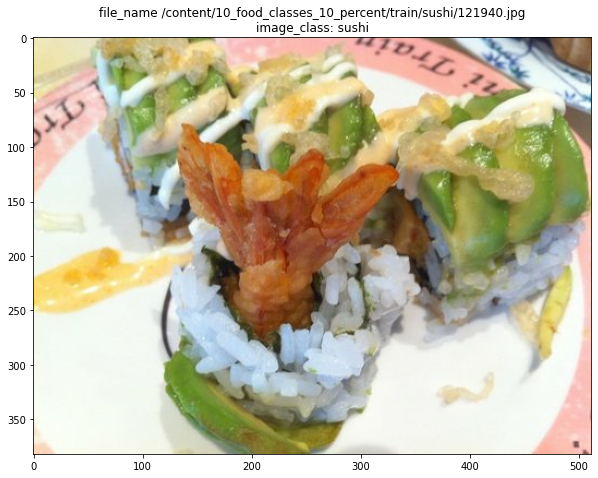

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_tf)
plt.title(f"file_name {image_path}\nimage_class: {random_dir}")
plt.grid(False)

these lines of codes have been fucntionalized in the fucntions:
1. **fetch_random_image**
2  **show_image**
in the usefl_fuinction pythoin module loaded in runtime

the tf.io funtions are reading and decoding the image file into a tensor while the plt.imread is reading and ecoding the image file into a numpy array (see below)

In [ ]:
img_tf.dtype,img_tf.shape

(tf.uint8, TensorShape([382, 512, 3]))

In [ ]:
img_np=plt.imread(image_path)
img_np.shape,type(img_np)

((382, 512, 3), numpy.ndarray)

In [ ]:
#to generate the labels

In [ ]:
class_names=os.listdir("/content/10_food_classes_10_percent/train")
class_names

['steak',
 'chicken_wings',
 'grilled_salmon',
 'chicken_curry',
 'pizza',
 'fried_rice',
 'ice_cream',
 'sushi',
 'hamburger',
 'ramen']

In [ ]:
def fetch_random_image(target_dir):
  """ this is return a random image selected in a random subdirectory from the specified target dir

      Args:
        target_dir: the specified directory where images are stored (in subfolder per class)
      outputs:
        image_path: full path of the randomly chosen image
        image_label: the class names the selected image belongs to
  """
  
  random_sub_dir=random.choice(os.listdir(target_dir))
  target_dir=os.path.join(target_dir,random_sub_dir)
  image=random.choice(os.listdir(target_dir))
  image_path=os.path.join(target_dir,image)
  return image_path, random_sub_dir

In [ ]:
image_path, image_label=fetch_random_image("/content/10_food_classes_10_percent/test")

In [ ]:
image_path,image_label

('/content/10_food_classes_10_percent/test/fried_rice/1856727.jpg',
 'fried_rice')

In [ ]:
def show_image(image_path,image_class,height=5,width=5):
  """
      Visualize the imae and the class it belongs to

      Args:
        image_path: full image path name
        image_class: class name of the image

      output:
        display the image (with full image path and class name as title)
        print out the image_tensor shape
    
  """
  img=tf.io.read_file(image_path)   #this is reading the file
  img_tf=tf.io.decode_image(img)    #this is decoding the image into a tensor diffrently from plt.imread which is generating a numpy array
  
  #display the image
  plt.figure(figsize=(height,width))
  plt.imshow(img_tf)
  plt.title(f"file_name {image_path}\nimage_class: {image_class}")
  plt.grid(False)

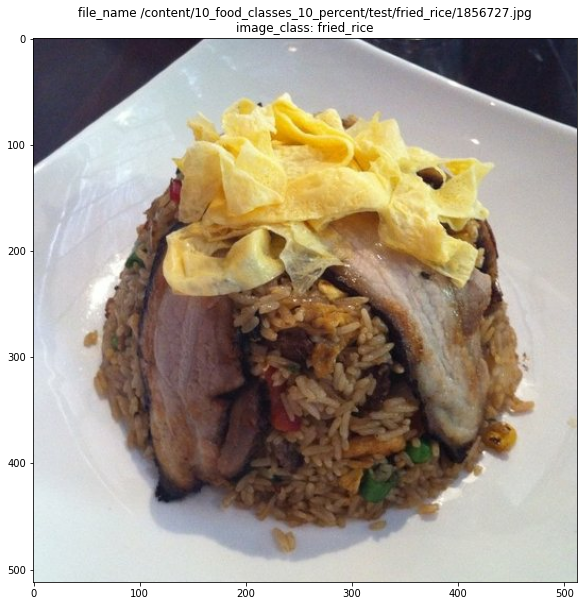

In [ ]:
show_image(image_path,image_label,10,10)

As the images files need to be preprocessed to be fed into the CNN, let's crate a function that can load the image from the specified image path and preprocess the image.
Preprocessing consist of:
1. read and decode the image file
2. rescale the image is this is needed (so rescaling is not done by one of the CNN layer (note: rescaling means multiply for 1/255. as we want to have tensor of value between [0,1]. We divide by 255. as we want to have all values in the tensor as float
3. we need to extend the image tensor dimensions in the axis=0 as the input of the CNN is organized in batch tensors of shape (32,heigh, width, color_channels)

In [ ]:
#remember that to reshape a tensor we use the method tf.reshape(tensor,shape=target_shape)
tensor=tf.constant(np.array([1.,2.,3.,4.]))
reshaped_tensor=tf.reshape(tensor,(2,2))
tensor,reshaped_tensor

(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([1., 2., 3., 4.])>,
 <tf.Tensor: shape=(2, 2), dtype=float64, numpy=
 array([[1., 2.],
        [3., 4.]])>)

In [ ]:
def image_load_preprocess(image_path,height=None,width=None,scaling=False):
  """
    this function is loading an image from specified image_path, is decoding into a tensor of image size defined by tuple image_size (default is (224,224)) 
    and is expanding the dimensionality as requested by NN model (1,height, width, color_channels)
    If scaleing == True that also scaling of image is performed (i.e. multiplying for 1/255.)

    Args:
      image_path is the full filename of the image to load
      height, width of the image for resizing (in case heigh and width are provided)
      scaling = True to rescale the image

    output:
      a tensor of floats (between 0 and 1 if sclaing is True) with dimension like (1,height,width,3) ready to be fed intpo the NN model for predictions
  """
  #reading the image and decoding into a tensor
  image=tf.io.read_file(image_path)
  image_tf=tf.io.decode_image(image)
  if (height and width) is not None:
    image_tf=tf.keras.layers.experimental.preprocessing.Resizing(height=224,width=224)(image_tf)
  print(f"image shape: {image_tf.shape}")

  #rescaling the image tensor if requested
  if scaling==True:
    image_tf=image_tf*(1/255.)

  #extending the dimensionality of the tensor into the shape (1,height, width,3)
  extended_image_tf=tf.expand_dims(image_tf,axis=0)
  print(f"extended image shape: {extended_image_tf.shape}")

  return extended_image_tf

In [ ]:
image_path, image_label=fetch_random_image("/content/10_food_classes_10_percent/test")

In [ ]:
image_tf=image_load_preprocess(image_path,224,224)

image shape: (224, 224, 3)
extended image shape: (1, 224, 224, 3)


let's test the first fucntions that we have put in to the pythin script **useful_functions** we have imported into our runtime

In [ ]:
from useful_functions import unzip_data,fetch_random_image,image_load_preprocess,show_image

In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
target_dir="/content/10_food_classes_10_percent/test"

In [ ]:
filename,image_class=fetch_random_image(target_dir)

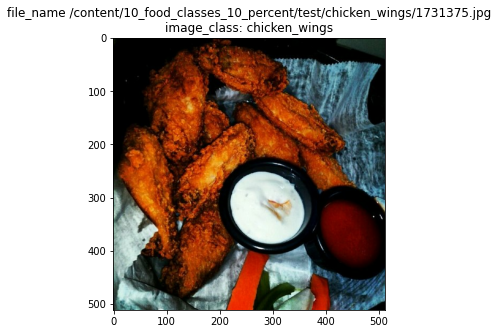

In [ ]:
show_image(filename,image_class,height=7,width=5)

In [ ]:
image_load_preprocess(filename)

image shape: (512, 512, 3)
extended image shape: (1, 512, 512, 3)


<tf.Tensor: shape=(1, 512, 512, 3), dtype=uint8, numpy=
array([[[[18, 27,  8],
         [13, 22,  5],
         [17, 25, 12],
         ...,
         [30, 47, 39],
         [28, 43, 36],
         [24, 39, 32]],

        [[17, 26,  7],
         [13, 22,  5],
         [16, 24, 11],
         ...,
         [28, 45, 37],
         [27, 42, 35],
         [24, 39, 32]],

        [[19, 28,  7],
         [15, 24,  5],
         [17, 25, 10],
         ...,
         [27, 44, 36],
         [28, 43, 36],
         [26, 41, 34]],

        ...,

        [[ 0,  5,  0],
         [ 5, 18,  9],
         [28, 41, 34],
         ...,
         [ 0,  0,  0],
         [ 0,  1,  0],
         [ 0,  1,  0]],

        [[ 0,  5,  0],
         [ 0, 12,  3],
         [31, 47, 37],
         ...,
         [ 1,  0,  0],
         [ 1,  0,  0],
         [ 1,  0,  0]],

        [[ 0,  8,  0],
         [ 0,  8,  0],
         [26, 42, 32],
         ...,
         [ 1,  0,  0],
         [ 3,  0,  0],
         [ 4,  0,  0]]]], dtype

In [ ]:
#steps to build a model using fucntional API

Now let's start practicing on how to build a CNN using the **keras fucntional API**
these are the steps we want to expolre for this practice

1. create the image pipeline for training... create the image dataset from directory for train and test
2. test the shape and format for batch tensors of images
3. create an augmentation layer with sequential API called Augmentation_layer
4  create a new model based on a feature extraction layer
5. compile the model and train using also tensorflow callbacks
6. check the performance and try to optimize


In [ ]:
train_dir="/content/10_food_classes_10_percent/train"
test_dir="/content/10_food_classes_10_percent/test"

In [ ]:
#create an image pipeline using the image dataset from directory

train_image_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     batch_size=32,
                                                                     image_size=(224,224),
                                                                     shuffle=True,label_mode="categorical")
test_image_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    batch_size=32,
                                                                    image_size=(224,224),
                                                                    shuffle=True,label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


these commands are creating a **BatchDataset** which is an aggregation of tensors (image and also label generated from the specified target directories).
We can use the methods **.take(up to number)** to enumerate elements of this Dataset

In [ ]:
train_image_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for image,label in train_image_data.take(4):
  print(f"image shape: {image.shape}, label shape: {label.shape}")

image shape: (32, 224, 224, 3), label shape: (32, 10)
image shape: (32, 224, 224, 3), label shape: (32, 10)
image shape: (32, 224, 224, 3), label shape: (32, 10)
image shape: (32, 224, 224, 3), label shape: (32, 10)


In [ ]:
for image,label in train_image_data.take(1):
  image_batch=image,
  image_label_batch=label

In [ ]:
len(image)

32

In [ ]:
for item in image[:10]:
  print(item.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


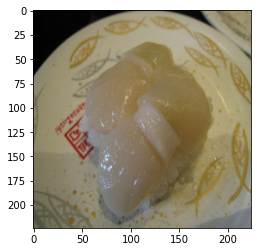

In [ ]:
plt.imshow(tf.cast(image[5],dtype=tf.int32))

another very useful function from Dataset is the **class_names** which is generating the list of classes as inferred from the specified target directories

In [ ]:
train_image_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

another very useful method of a Dataset is the **unbatch** method which is simply unpacdking the batch data set

In [ ]:
#let's investigate the difference between betched and unbatched Image_Data_set
unbatched_train=train_image_data.unbatch()

In [ ]:
unbatched_train

<_UnbatchDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [ ]:
for image, label in unbatched_train.take(2):
  print(image.shape,label.shape)

(224, 224, 3) (10,)
(224, 224, 3) (10,)


see that in this case the image and label are not in batches but are provided as simple tensors

In [ ]:
for image_batch, label_batch in train_image_data.take(2):
  print(image_batch.shape,label_batch.shape)

(32, 224, 224, 3) (32, 10)
(32, 224, 224, 3) (32, 10)


# Augmentation of training data: how to build an augmentation layer 

Now let's create an **augmentation layer** that will be included in the CNN model later on. This augmenation layer is simply augmenting the training image data (so is not used for testing). The augmentation layer may or maynot include a Resizing moduie. To define this augmentation layer we use the **keras Sequential API**. Note: building an augmentation layer inside the CNN model is more efficient as the augmentation od data is done by GPUs at training (much faster than doing externally using the alternative method **ImageDataGenerator**  see the link here:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
augmented_layer=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),        
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    #tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,offset=0),   #I have commented as this is included already in the imagenet base model we'll be using for our CNN
    tf.keras.layers.experimental.preprocessing.Resizing(height=224,width=224)],name="data_aug_layer")


In [ ]:
augmented_layer.build(input_shape=(None,224,224,3))  #I've used this build method jsy tobe able to shpoe the augmented layer with the summary method
augmented_layer.summary()

Model: "data_aug_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_9 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_flip_9 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_zoom_9 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 random_height_9 (RandomHeig  (None, 224, 224, 3)      0         
 ht)                                                             
                                                                 
 resizing_10 (Resizing)      (None, 224, 224, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable pa

Note here that there are no trainable parameter for this augmentation layer as this is onl used to increase the train data variability (so is a good technique for **Regularization** or to reduce model **overfitting**
NOw let's visualize the effect of the augmentation layer on a sample image of our data set

In [ ]:
image_path,image_label=fetch_random_image(train_dir)   #let's fetch a random image
print(image_path,image_label)

/content/10_food_classes_10_percent/train/chicken_wings/1732957.jpg chicken_wings


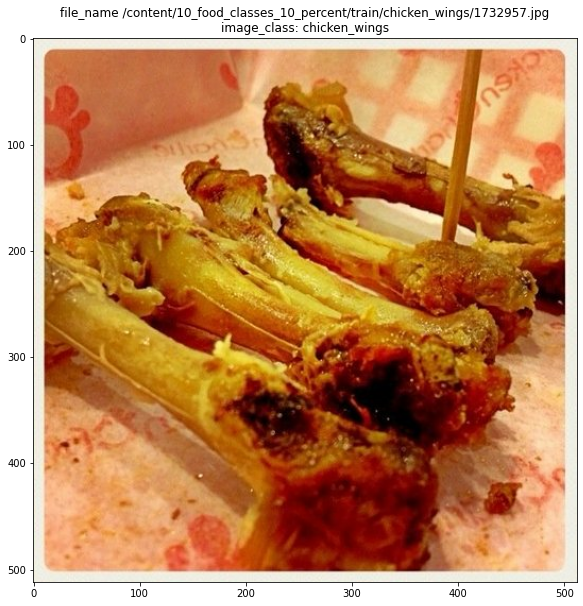

In [ ]:
show_image(image_path,image_label)  #let's see the original random image that has been fecthed from the train_dir

In [ ]:
image=image_load_preprocess(image_path)   #let's preprocess this image making in a required tensor format ready to be processed by the augmentation layer

image shape: (512, 512, 3)
extended image shape: (1, 512, 512, 3)


In [ ]:
aug_image=augmented_layer(image)   #see how the fucntional API is used to pass the image into the augmentation layer
aug_image.shape,aug_image.dtype                    #see also that the image is resized and is also extended in dimensionality to fit the bacth shape

(TensorShape([1, 224, 224, 3]), tf.float32)

In [ ]:
augmented_image=tf.cast(aug_image,dtype=tf.int32)  #to be able to show the image using plt we need to cast all value into integers using the command tf.cast

In [ ]:
augmented_image.shape,augmented_image.dtype

(TensorShape([1, 224, 224, 3]), tf.int32)

In [ ]:
augmented_image=tf.squeeze(augmented_image,axis=0)    #to pass the image to plt for showing we need to remove the extra dimensinality (batch) using the tf.squeeze command

Text(0.5, 1.0, 'augmented image')

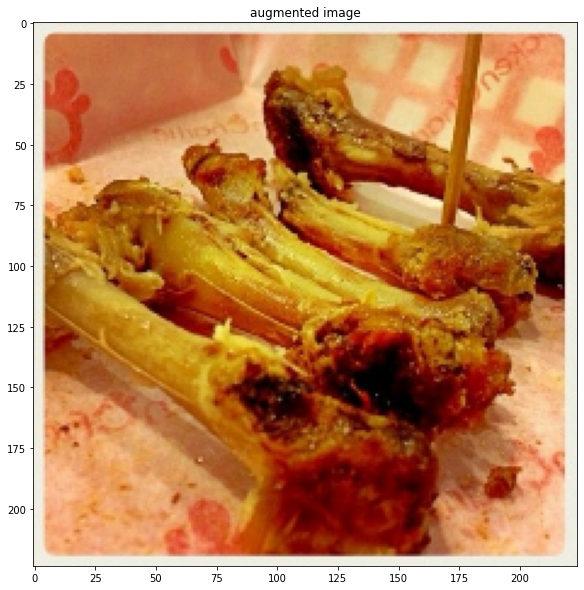

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(augmented_image)
plt.title("augmented image")

now we can clearly see that the image has been Zoomed, has been resized (to 224,224) and has also been slighlty rotated as expected by the augmentation layer

# functionalizing most recurrent functions for processing and visualizing images

------------------------------------------------------------------------------
**Quick break & recap.**
 Is useful to functionalize the lines of codes seen above for showing the image before and after the passing through the augmentation layer as this may be needed later on (and we do not want to rewrite the full code again)

In [ ]:
def visualize_before_after(original_image,new_image,resize=False):
  """
    this function is visualizing the difference between the original image and the new image
  """

  print(f"original image shape: {original_image.shape}")
  plt.figure(figsize=(10,10))
  plt.imshow(original_image)
  plt.title("original image")

  #resize the new_image if needed (resize=True)
  if resize==True:
    scaling_factor=255
  else:
    scaling_factor=1 
  final_image=tf.cast(new_image,dtype=tf.int32)*scaling_factor
  #display the new image
  print(f"final Image shape: {final_image.shape}")
  plt.figure(figsize=(10,10))
  plt.imshow(final_image)
  plt.title("output_image")
  

Now lets test all: More in details we are going to do:
1. we fetch a random image using the module **fetch_random_image** which is returnuing the original_image path and also the original image label
2. the we preprocess the image so that can be passed to the augmentation layer. for this we use the module **image_load_preprocess** passing just the original image path and label
3. then we pass this preprocessed image into the **augmented_layer** using the fucntional API model and get a new image (with resized image size and also in int format) so that can be read by pyplot
4 we then compare the original and new image using the module **visualize_before_after** so show the difference and also the impact of the augmetation layer

In [ ]:
original_image,original_label=fetch_random_image(train_dir)
original_image,original_label

('/content/10_food_classes_10_percent/train/grilled_salmon/2231692.jpg',
 'grilled_salmon')

In [ ]:
original_image=image_load_preprocess(original_image,original_label)

image shape: (512, 512, 3)
extended image shape: (1, 512, 512, 3)


In [ ]:
original_image.shape,original_image.dtype

(TensorShape([1, 512, 512, 3]), tf.uint8)

In [ ]:
new_image=augmented_layer(original_image)
new_image.shape,new_image.dtype

(TensorShape([1, 224, 224, 3]), tf.float32)

original image shape: (512, 512, 3)
final Image shape: (224, 224, 3)


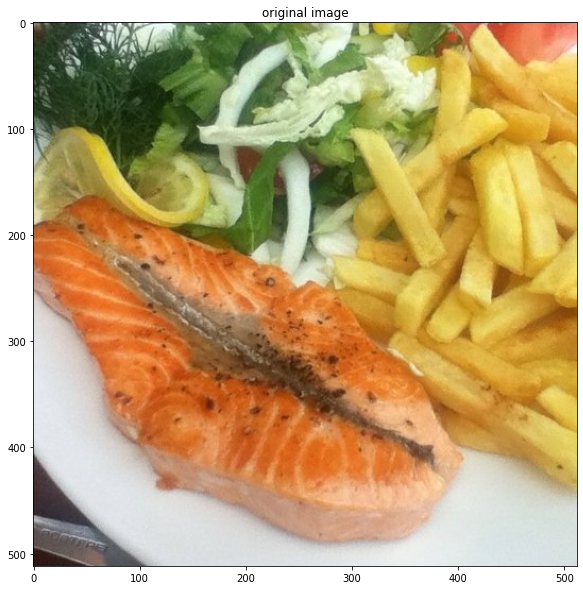

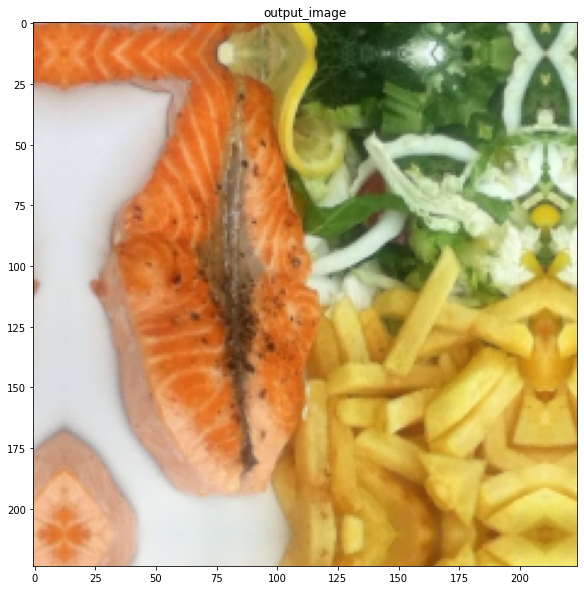

In [ ]:
#let's test our new fucntion to compare image before and after augentation layer
visualize_before_after(original_image[0],new_image[0])

Now let's start creting a new CNN model using a **feature extraction** model that we can find in **keras.applications**. See link here for more info: https://www.tensorflow.org/api_docs/python/tf/keras/applications. In partivular here we are interseted in using the **EfficientNetB0** CNN to make our feature extraction layer

# Feature extraction layer and feature vector: how to and what is the meaning

In [ ]:
#create a new model using a base model from applications
feature_extraction=tf.keras.applications.EfficientNetB0(include_top=False)   #top_include=False will exlude the final original model top layers (i.e the original classifier) to allow us to add our own classifier.
feature_extraction.trainable=False                  #we ae also freezing here all the layers belonging to the uploaded EfficientNet CNN 


Remember here the concept of a feature extraction layer is that of using an originally fully trained CNN where we freeze the learnable parameters and remove the final classifiers (or output layers) as we replace this with our own output layer. The Featrure extraction is providing as output a so called **feature vector** that can be fed into out classifier or output layer. See picture below for a quick reminder


---

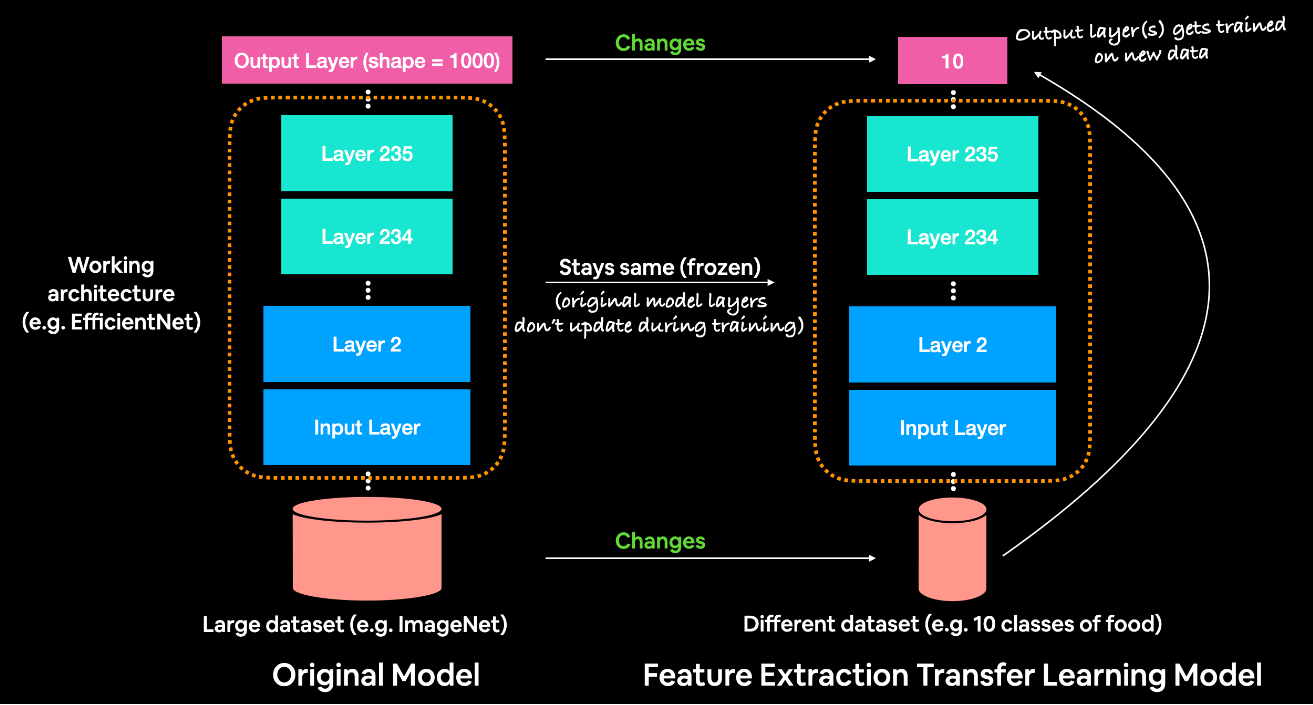


In [ ]:
#let's ahve a check on this feature extraction layer
for index,layer in enumerate(feature_extraction.layers[-10:]):    #for simplicity we enumerate only the last 10 layers
  print(f"index: {index} | layer name {layer.name}   | is trainable {layer.trainable}")

index: 0 | layer name block7a_se_squeeze   | is trainable False
index: 1 | layer name block7a_se_reshape   | is trainable False
index: 2 | layer name block7a_se_reduce   | is trainable False
index: 3 | layer name block7a_se_expand   | is trainable False
index: 4 | layer name block7a_se_excite   | is trainable False
index: 5 | layer name block7a_project_conv   | is trainable False
index: 6 | layer name block7a_project_bn   | is trainable False
index: 7 | layer name top_conv   | is trainable False
index: 8 | layer name top_bn   | is trainable False
index: 9 | layer name top_activation   | is trainable False


In [ ]:
exclude_top=(len(feature_extraction.layers),feature_extraction.trainable_variables)
print(exclude_top)

(237, [])


let's check the difference in case we put as True the include_top when loading the EfficientNetB0 model to see really what has been excluded

In [ ]:
efficientNet=tf.keras.applications.EfficientNetB0(include_top=True)   #in this case we are loading the full CNN model wo excluding the top_layers.  

21848064/21834768 [==============================] - 0s 0us/step


In [ ]:
len(efficientNet.layers),efficientNet.layers[-1].output_shape

(240, (None, 1000))

In [ ]:
#let's investigate more on the output_shape of top layers of efficientNet
for index,layer in enumerate(efficientNet.layers[-5:]):
  print(f"layer name: {layer.name},  layer input shape: {layer.input_shape},  layer output shape:{layer.output_shape}")

layer name: top_bn,  layer input shape: (None, 7, 7, 1280),  layer output shape:(None, 7, 7, 1280)
layer name: top_activation,  layer input shape: (None, 7, 7, 1280),  layer output shape:(None, 7, 7, 1280)
layer name: avg_pool,  layer input shape: (None, 7, 7, 1280),  layer output shape:(None, 1280)
layer name: top_dropout,  layer input shape: (None, 1280),  layer output shape:(None, 1280)
layer name: predictions,  layer input shape: (None, 1280),  layer output shape:(None, 1000)


In [ ]:
#let's compare with the ones of our features extraction layer (obtained from efficientNet just removing the top layers)
for index,layer in enumerate(feature_extraction.layers[-5:]):
  print(f"layer name: {layer.name},  layer input shape: {layer.input_shape},  layer output shape:{layer.output_shape}")

layer name: block7a_project_conv,  layer input shape: (None, None, None, 1152),  layer output shape:(None, None, None, 320)
layer name: block7a_project_bn,  layer input shape: (None, None, None, 320),  layer output shape:(None, None, None, 320)
layer name: top_conv,  layer input shape: (None, None, None, 320),  layer output shape:(None, None, None, 1280)
layer name: top_bn,  layer input shape: (None, None, None, 1280),  layer output shape:(None, None, None, 1280)
layer name: top_activation,  layer input shape: (None, None, None, 1280),  layer output shape:(None, None, None, 1280)


In [ ]:
#it's evident that the top layers excluded start with the layer names avg_pool (which is followed by a top_dropout layer). The final layer removed is the prediction which is having 1000 features as output
#let's try to undertand better the role of the Pooling layers (GlobalAverage2D)

extended_tf=tf.constant(np.random.randint(0,100,size=12).reshape(1,2,2,3))
extended_tf.shape


TensorShape([1, 2, 2, 3])

In [ ]:
extended_tf

<tf.Tensor: shape=(1, 2, 2, 3), dtype=int64, numpy=
array([[[[47, 33, 54],
         [25, 63, 49]],

        [[14, 12, 44],
         [ 0, 74, 87]]]])>

In [ ]:
avg_pooled=tf.keras.layers.GlobalAvgPool2D()(extended_tf)
avg_pooled.shape,avg_pooled

(TensorShape([1, 3]),
 <tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[21, 45, 58]])>)

so the effect of GlobalAveragePool2D is simply that of doing the mean across the intermedia axis (so is **dimensionality reduction**) which is need to pass the feature extraction to the output final Dense layer

In [ ]:
tf.reduce_mean(extended_tf,axis=[1,2])   #this is exactly the same result

<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[21, 45, 58]])>

So now we can see what is the meaning of a **feature vector**. Pracically is the output of the feature extraction layer passed through a **dimensionality reduction** GobalAveragePooling layer so that the shape of the feature vector is compatible with the final calssification layer i.e. of the type **(None,numeber of extracted features)**

In [ ]:
#let's see this in action by applying the feature extraction model to a sample image to see what comes out as faeture vector 
x=feature_extraction(original_image)
print(f"feature extraction output shape: {x.shape}")
feature_vector=tf.keras.layers.GlobalAvgPool2D()(x)
print(f"feature vector output shape: {feature_vector.shape}")

feature extraction output shape: (1, 16, 16, 1280)
feature vector output shape: (1, 1280)


# Now let start building our own full CNN

Now that we have created our augmentation layer and also a feature extraction layer from an available keras CNN application (EfficientNetB0) using the tranfer learning concept we can build our own CNN
For this we are going to use the keras **functional API** whwre each layer is defined in terms of its input output relation and at the end we call the keras.Model(input,output) method to create the complete model

In [ ]:
input=tf.keras.Input(shape=(224,224,3),name="input_layer")
layer_1=augmented_layer(input)
layer_2=feature_extraction(layer_1)
layer_3=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(layer_2)
output=tf.keras.layers.Dense(10,activation="softmax",name="classification_layer")(layer_3)
model_1=tf.keras.Model(input,output)

In [ ]:
model_1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, 224, 224, 3)      0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 classification_layer (Dense  (None, 10)               12810     
 )                                                               
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-train

In [ ]:
model_1.layers[2].trainable  #check that the efficientNet feature extraction layer is fully frozen

False

let's create a TensorBoard call back which will be needed to save in **TensorFlow Board** the result all the experiments. More info on how to launch tensorflow Board is available at this link: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
#let's create a Tensor Board callback
log_dir="/content/TensorBoard"

In [ ]:
import datetime

In [ ]:
#let's fecth the current data
current_date=datetime.datetime.now().strftime("%m_%d_%Y")
current_date,type(current_date)

('08_05_2022', str)

In [ ]:
experiment_name="10_food_classes_10_percent"

In [ ]:
log_dir=log_dir+"/"+experiment_name+"/"+current_date

In [ ]:
log_dir

'/content/TensorBoard/10_food_classes_10_percent/08_05_2022'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)  #this is the command to generate the callback

In [ ]:
#again all this is more convenient to functionaze as these lines of codes will be needed
def create_tensorboard_callback(directory,experiment_name):
  """
  this function is creating a tensorflow call using the directory and the experiment name provided
  Args:
    directory is the full path of the log dir root
    experiment_name is the subdir created correspondimng to the experiment

  Output:
    a tensorborad call back point at the directory named: directory+"/"+experiment_name+"/"+current_date
  """
  
  current_date=datetime.datetime.now().strftime("%m_%d_%Y")
  log_dir=directory+"/"+experiment_name+"/"+current_date
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"TensorBoard log dir created: {log_dir}")
  return tensorboard_callback

In [ ]:
#let's test this fucntion in action
tensor_board_callback=create_tensorboard_callback("/content/TensorBoard","experiment1")

TensorBoard log dir created: /content/TensorBoard/experiment1/08_05_2022


In [ ]:
#now let's compile the model_1

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
#just as a remainder that we need to feed the model for training and testing with the prepared batchDatasets
train_image_data,test_image_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [ ]:
len(test_image_data)

79

In [ ]:
#now we train the model_1
model_1_history=model_1.fit(train_image_data,batch_size=32,
                            epochs=5,
                            steps_per_epoch=len(train_image_data),
                            validation_data=test_image_data,
                            validation_steps=int(0.25*len(test_image_data)),
                            callbacks=[tensor_board_callback]
                            )

Epoch 1/5
24/24 [==============================] - 12s 250ms/step - loss: 0.5067 - accuracy: 0.0213 - val_loss: 0.3188 - val_accuracy: 0.4095
Epoch 2/5
24/24 [==============================] - 3s 146ms/step - loss: 0.3213 - accuracy: 0.2293 - val_loss: 0.2962 - val_accuracy: 0.3980
Epoch 3/5
24/24 [==============================] - 5s 192ms/step - loss: 0.3012 - accuracy: 0.3400 - val_loss: 0.2783 - val_accuracy: 0.4507
Epoch 4/5
24/24 [==============================] - 3s 144ms/step - loss: 0.2791 - accuracy: 0.4427 - val_loss: 0.2601 - val_accuracy: 0.5247
Epoch 5/5
24/24 [==============================] - 3s 145ms/step - loss: 0.2604 - accuracy: 0.5187 - val_loss: 0.2432 - val_accuracy: 0.5839


Now let's see the performance in terms of training and validation losses and accuracies

In [ ]:
performance_1=pd.DataFrame(model_1_history.history)

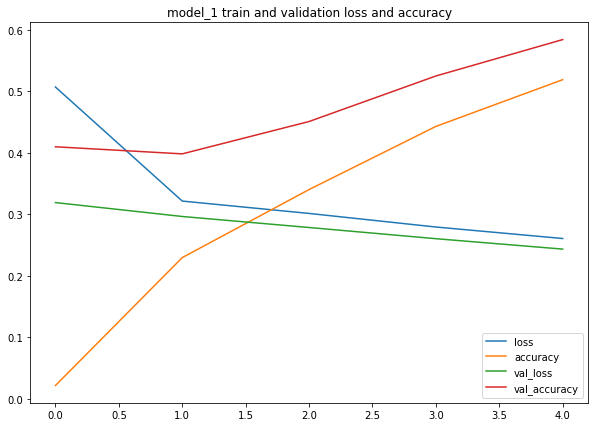

In [ ]:
performance_1.plot(figsize=(10,7),title="model_1 train and validation loss and accuracy")

we have done the validation only on a fraction of 25% of that test data to speed up the training. Let's chech the accuracy on the full test data. We can see that this is a bit lower....

In [ ]:
model_1.evaluate(test_image_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.2324 - accuracy: 0.7148


[0.23238547146320343, 0.7148000001907349]

# How to save the model and reload

Now let's save the full model (architecture and also trainable parameters). Use the method save (tf.keras.models.save_model(model,filepath)). An alternative way is to call model.save(filepath). We get a new directory in the runtime environment with specified name and like the picture below:


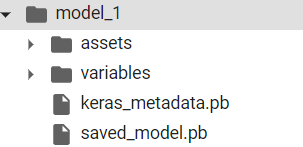

In [ ]:
model_1.save("model_1")

INFO:tensorflow:Assets written to: model_1/assets


INFO:tensorflow:Assets written to: model_1/assets


In [ ]:
#let's clone the model

In [ ]:
cloned_model_1=tf.keras.models.clone_model(model_1)

In [ ]:
cloned_model_1.summary()  #this is identical to model_1

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, 224, 224, 3)      0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 classification_layer (Dense  (None, 10)               12810     
 )                                                               
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [ ]:
cloned_model_1.layers[-1].weights[0]

<tf.Variable 'classification_layer/kernel:0' shape=(1280, 10) dtype=float32, numpy=
array([[-0.03822215,  0.04612117, -0.03790049, ..., -0.03774625,
         0.00034954, -0.0023551 ],
       [ 0.01991084,  0.05223561,  0.05079298, ...,  0.00488025,
         0.00346182,  0.06693382],
       [ 0.05906098, -0.05081555, -0.04199642, ..., -0.02983821,
        -0.03170652, -0.01747755],
       ...,
       [-0.01008018, -0.00256645,  0.00777756, ..., -0.00035892,
         0.02041539,  0.03512603],
       [-0.05199814, -0.00970916,  0.04974889, ...,  0.02062187,
         0.02223106, -0.0200306 ],
       [-0.0081015 , -0.01641726, -0.00933884, ..., -0.04621004,
         0.03979909,  0.01056161]], dtype=float32)>

In [ ]:
model_1.layers[-1].weights[0]

<tf.Variable 'classification_layer/kernel:0' shape=(1280, 10) dtype=float32, numpy=
array([[ 0.03099507, -0.0621743 ,  0.040859  , ..., -0.08066315,
        -0.04022388, -0.02741561],
       [ 0.04188365,  0.02021439, -0.02956446, ...,  0.00068383,
        -0.00275462, -0.03854478],
       [-0.00291471, -0.0872127 , -0.02732033, ..., -0.03264487,
         0.07049321,  0.03787808],
       ...,
       [-0.03385176, -0.0352129 ,  0.07379113, ..., -0.07641966,
        -0.02586085, -0.0399745 ],
       [ 0.00389635, -0.04261059, -0.08013017, ...,  0.01540656,
         0.05339358,  0.00770826],
       [ 0.00381701, -0.07814433, -0.02827502, ..., -0.04452355,
        -0.04467302, -0.02384721]], dtype=float32)>

so it's important to understand that the in the cloned model the trainable parameters are randomly generated. So are different from those of the learned model (of course we must control only the layers that are not forzen like the layer[2 which is the feature extraction)

In [ ]:
cloned_model_1.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [ ]:
cloned_model_1.evaluate(test_image_data)

79/79 [==============================] - 8s 72ms/step - loss: 2.3026 - accuracy: 0.0696


[2.3025856018066406, 0.06960000097751617]

So the model need to be first compiled and also as the trainable parameters are random the evaluation peformance are poor. To upload into the cloned model the trained parameters we need to use the method **load_weights**

In [ ]:
model_1.save_weights("/content/temp/data")

In [ ]:
cloned_model_1.load_weights("/content/temp/data")

In [ ]:
cloned_model_1.layers[-1].weights[0]  #now the parameters are the same as model 1

<tf.Variable 'classification_layer/kernel:0' shape=(1280, 10) dtype=float32, numpy=
array([[ 0.03099507, -0.0621743 ,  0.040859  , ..., -0.08066315,
        -0.04022388, -0.02741561],
       [ 0.04188365,  0.02021439, -0.02956446, ...,  0.00068383,
        -0.00275462, -0.03854478],
       [-0.00291471, -0.0872127 , -0.02732033, ..., -0.03264487,
         0.07049321,  0.03787808],
       ...,
       [-0.03385176, -0.0352129 ,  0.07379113, ..., -0.07641966,
        -0.02586085, -0.0399745 ],
       [ 0.00389635, -0.04261059, -0.08013017, ...,  0.01540656,
         0.05339358,  0.00770826],
       [ 0.00381701, -0.07814433, -0.02827502, ..., -0.04452355,
        -0.04467302, -0.02384721]], dtype=float32)>

In [ ]:
cloned_model_1.evaluate(test_image_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.8425 - accuracy: 0.7740


[0.8424524664878845, 0.7739999890327454]

In [ ]:
model_1.evaluate(test_image_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.0884 - accuracy: 0.8424


[0.08837190270423889, 0.8424000144004822]

# practicing with tensor board

In [ ]:
!tensorboard dev upload --logdir ./TensorBoard/ \--name "practice using TensorBoard" \--description "my try" \--one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./TensorBoard/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=i47dB2FqMtj5m4FfQldr5t8BYUSBMA&prompt=consent&access_type=offlin

here is the TensorBoard image

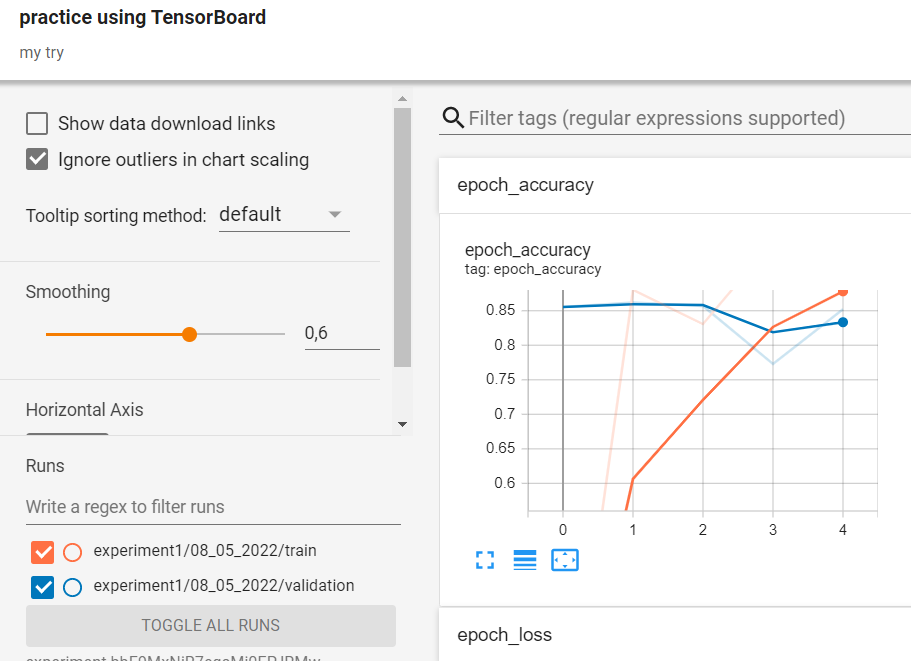

# Understanding the outputs of the model

In [ ]:
#let's recreate the image pipeline using the image dataset from directory BUT putting suffle=False

train_image_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     batch_size=32,
                                                                     image_size=(224,224),
                                                                     shuffle=False,label_mode="categorical")
test_image_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    batch_size=32,
                                                                    image_size=(224,224),
                                                                    shuffle=False,label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#now we need to re-train the model_1
model_1_history=model_1.fit(train_image_data,batch_size=32,
                            epochs=5,
                            steps_per_epoch=len(train_image_data),
                            validation_data=test_image_data,
                            validation_steps=int(0.25*len(test_image_data)),
                            callbacks=[tensor_board_callback]
                            )

Epoch 1/5
24/24 [==============================] - 4s 146ms/step - loss: 0.4536 - accuracy: 0.1760 - val_loss: 0.3908 - val_accuracy: 0.2961
Epoch 2/5
24/24 [==============================] - 5s 192ms/step - loss: 0.3392 - accuracy: 0.2573 - val_loss: 0.1722 - val_accuracy: 0.6990
Epoch 3/5
24/24 [==============================] - 3s 142ms/step - loss: 0.2682 - accuracy: 0.4120 - val_loss: 0.1711 - val_accuracy: 0.6826
Epoch 4/5
24/24 [==============================] - 5s 194ms/step - loss: 0.2344 - accuracy: 0.5520 - val_loss: 0.1566 - val_accuracy: 0.7056
Epoch 5/5
24/24 [==============================] - 3s 146ms/step - loss: 0.2079 - accuracy: 0.6360 - val_loss: 0.1356 - val_accuracy: 0.7385


In [ ]:
model_1.evaluate(test_image_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.1155 - accuracy: 0.8104


[0.11546208709478378, 0.8104000091552734]

In [ ]:
model_1_pred_probs=model_1.predict(test_image_data)

In [ ]:
class_names=train_image_data.class_names

we must use the **tf.argmax(predicted probability,axis=1)** to be able to select only the class index if the highest probability class and then match this with the class_names

In [ ]:
model_1_pred_classes=tf.argmax(model_1_pred_probs,axis=1)

In [ ]:
model_1_pred_classes[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 7, 0, 0, 4, 7, 0, 0])>

to genarete the y_true so the test label of corresponding test DataSet we need to use the **unbatch command** to unpack the tensors and extract the hot encoded vecors for each of the test image point. Then as usual we use the tf.argmax() to establish the corresponding class numbers

In [ ]:
test_labels=[]
for image, label in test_image_data.unbatch():
  test_labels.append(label)

In [ ]:
true_classes=tf.argmax(test_labels,axis=1)

In [ ]:
true_classes[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [ ]:
accuracy=np.mean(model_1_pred_classes==true_classes)

In [ ]:
accuracy  #the problem in this case is due to the fact that I've enabled the shuflle = True in the image test_image dataset

0.8104

so now this is correspondimng to the accuracy calculate with the methid evaluate

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, model_1_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       250
           1       0.82      0.90      0.86       250
           2       0.92      0.82      0.87       250
           3       0.72      0.71      0.71       250
           4       0.82      0.81      0.82       250
           5       0.83      0.89      0.86       250
           6       0.87      0.96      0.91       250
           7       0.70      0.98      0.82       250
           8       0.69      0.81      0.75       250
           9       0.96      0.70      0.81       250

    accuracy                           0.81      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.82      0.81      0.81      2500



this is a way to clone an existing model using the clone_model method of keras.models

# Model Check point callbacks and fine tuning

In [ ]:
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath="/content/temp",
                                                       monitor="val_loss",verbose=1,
                                                       save_best_only=True,
                                                       save_weights_only=True)

In [ ]:
checkpoint_callback

In [ ]:
#now let's create and train a clone model using the checkpoint created above
model_3=tf.keras.models.clone_model(model_1)

In [ ]:
model_3.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
initial_epochs=5
model_3_history=model_3.fit(train_image_data,
                            epochs=initial_epochs,
                            batch_size=32,
                            steps_per_epoch=len(train_image_data),
                            validation_data=test_image_data,
                            validation_steps=int(0.25*len(test_image_data)),
                                                 callbacks=[checkpoint_callback])

Epoch 1/5
23/24 [===========================>..] - ETA: 0s - loss: 2.3410 - accuracy: 0.0625
Epoch 1: val_loss improved from inf to 2.25455, saving model to /content/temp
24/24 [==============================] - 12s 212ms/step - loss: 2.3419 - accuracy: 0.0613 - val_loss: 2.2546 - val_accuracy: 0.4112
Epoch 2/5
23/24 [===========================>..] - ETA: 0s - loss: 2.3106 - accuracy: 0.0788
Epoch 2: val_loss did not improve from 2.25455
24/24 [==============================] - 3s 144ms/step - loss: 2.3113 - accuracy: 0.0773 - val_loss: 2.2719 - val_accuracy: 0.4112
Epoch 3/5
23/24 [===========================>..] - ETA: 0s - loss: 2.3101 - accuracy: 0.0571
Epoch 3: val_loss did not improve from 2.25455
24/24 [==============================] - 3s 143ms/step - loss: 2.3104 - accuracy: 0.0560 - val_loss: 2.2823 - val_accuracy: 0.4112
Epoch 4/5
23/24 [===========================>..] - ETA: 0s - loss: 2.3078 - accuracy: 0.0584
Epoch 4: val_loss did not improve from 2.25455
24/24 [========

In [ ]:
model_3.evaluate(test_image_data)

79/79 [==============================] - 6s 72ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3025684356689453, 0.10000000149011612]

# How to do fine tuning

In [ ]:
model_1_history.epoch

[0, 1, 2, 3, 4]

In [ ]:
len(model_1.trainable_variables)

2

In [ ]:
for layer in model_1.layers:
  print(layer.name,layer.trainable)

input_layer True
data_aug_layer True
efficientnetb0 False
global_average_pooling_layer True
classification_layer True


In [ ]:
#now let's unfreeze the last top 10 layers of the feature extraction base model
model_1.layers[2].trainable=True
for layer in model_1.layers[2].layers[:-10]:
  layer.trainable=False

In [ ]:
for layer in model_1.layers[2].layers:
  print(layer.name,layer.trainable)

input_3 False
rescaling_2 False
normalization_2 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False

In [ ]:
len(model_1.layers[2].trainable_variables)

10

In [ ]:
initial_epochs=model_1_history.epoch[-1]
initial_epochs

4

In [ ]:
fine_tune_epochs=initial_epochs+5

In [ ]:
model_1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])

In [ ]:
model_1_fine_tuned_history = model_1.fit(train_image_data,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=model_1_history.epoch[-1],
                                           validation_data=test_image_data,
                                           validation_steps=int(0.25 * len(test_image_data)),
                                           callbacks=[checkpoint_callback])

Epoch 5/9
23/24 [===========================>..] - ETA: 0s - loss: 2.3596 - accuracy: 0.2310
Epoch 5: val_loss improved from 2.25455 to 1.22944, saving model to /content/temp
24/24 [==============================] - 11s 212ms/step - loss: 2.3599 - accuracy: 0.2280 - val_loss: 1.2294 - val_accuracy: 0.7303
Epoch 6/9
23/24 [===========================>..] - ETA: 0s - loss: 2.2151 - accuracy: 0.2962
Epoch 6: val_loss did not improve from 1.22944
24/24 [==============================] - 4s 147ms/step - loss: 2.2159 - accuracy: 0.2933 - val_loss: 1.2498 - val_accuracy: 0.7253
Epoch 7/9
23/24 [===========================>..] - ETA: 0s - loss: 2.1572 - accuracy: 0.2867
Epoch 7: val_loss did not improve from 1.22944
24/24 [==============================] - 4s 147ms/step - loss: 2.1584 - accuracy: 0.2840 - val_loss: 1.2601 - val_accuracy: 0.7155
Epoch 8/9
23/24 [===========================>..] - ETA: 0s - loss: 2.1044 - accuracy: 0.3261
Epoch 8: val_loss did not improve from 1.22944
24/24 [====

In [ ]:
df=pd.DataFrame(model_1_fine_tuned_history.history)
df

loss  accuracy  val_loss  val_accuracy
0  2.359853  0.228000  1.229439      0.730263
1  2.215943  0.293333  1.249824      0.725329
2  2.158364  0.284000  1.260128      0.715461
3  2.105024  0.322667  1.268895      0.705592
4  2.040791  0.357333  1.270301      0.697368

In [ ]:
df1=pd.DataFrame(model_1_history.history)
df1

loss  accuracy  val_loss  val_accuracy
0  0.506711  0.021333  0.318818      0.409539
1  0.321266  0.229333  0.296195      0.398026
2  0.301156  0.340000  0.278280      0.450658
3  0.279067  0.442667  0.260067      0.524671
4  0.260370  0.518667  0.243150      0.583882

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

5
10
[0.02133333310484886, 0.2293333262205124, 0.3400000035762787, 0.4426666796207428, 0.518666684627533, 0.2280000001192093, 0.2933333218097687, 0.2840000092983246, 0.3226666748523712, 0.35733333230018616]


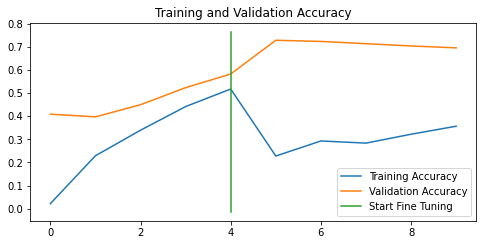

In [ ]:
compare_historys(model_1_history,model_1_fine_tuned_history,initial_epochs=5)

just a quick explanation of why thi is working

In [ ]:
acc=model_1_history.history["accuracy"]
new_acc=model_1_fine_tuned_history.history["accuracy"]

In [ ]:
acc

[0.02133333310484886,
 0.2293333262205124,
 0.3400000035762787,
 0.4426666796207428,
 0.518666684627533]

In [ ]:
new_acc

[0.2280000001192093,
 0.2933333218097687,
 0.2840000092983246,
 0.3226666748523712,
 0.35733333230018616]

In [ ]:
total_acc=acc+new_acc
total_acc

[0.02133333310484886,
 0.2293333262205124,
 0.3400000035762787,
 0.4426666796207428,
 0.518666684627533,
 0.2280000001192093,
 0.2933333218097687,
 0.2840000092983246,
 0.3226666748523712,
 0.35733333230018616]

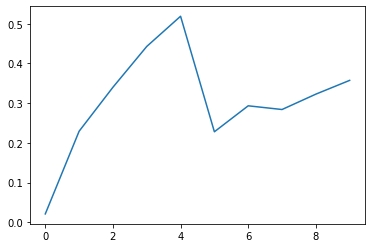

In [ ]:
plt.plot(total_acc)

In [ ]:
#just as reminder whe using the + operator on two list we are just concatenating them
[1]+[2]

[1, 2]